# Getting started with computational text analysis with Python

## Outline
* Set-up 
* Introduction to text analysis
    * What is meant by text analysis
    * Common methods 
    * Overview of topic modeling
* Hands-on in Jupyter Notebook
* Wrap-up

### Tips for Jupyter Notebooks: 

* Jupyter is an interactive coding environment where your Python code can be combined with narrative/documentation
* Some cells are markdown (like this one) and others are code
* Run a code cell using Shift-Enter or pressing the run button in the toolbar above
* This notebook is editable in JupyterHub, Binder, or if downloaded and running locally

In [ ]:
# try running this cell
a = 100
print(a)

In the last cell we have:
* A comment
* A variable
* A function 
* Data type -- number

Another data type is a string. 

In [ ]:
# see what happens when you print this string. Can you edit the string?
b = 'Hello world'
print(b)

In this notebook, we'll also use Python lists and tuples. Both can store mupltiple items in a single variable. Lists are changeable, where are tuples are not. Both are ordered, and you can use an index to look up items within them. 

In [ ]:
# this is a list
my_list = [2, 4, 6, 8]

In [ ]:
# how many elements are in this list?
len(my_list)

In [ ]:
# get the zero-th element in a list
my_list[0]

In [ ]:
# you can update elements in a list because it is mutable
my_list[2] = 100
my_list

In [ ]:
# add a new element with the append() method
# lists can hold elements of varying data types
my_list.append('hello')
my_list

In [ ]:
# now we'll create a tuple
my_tuple = (1, 2, 3)

In [ ]:
# view my_tuple
my_tuple

In [ ]:
# get the second element in a list
my_tuple[2]

In [ ]:
my_list.append('hello')
my_tuple

In order to do more complex coding, we need to download **libraries** and import **modules**

Common Python libraries used for text analysis:
* Pandas
* Natural Language Toolkit (NLTK)
* Gensim 

Libraries need to be installed in the environment where you are using them. 

A few modules we use in this notebook:
* Glob (standard in Python 3.10+)
* NLTK stopwords (availble if NLTK installed)

Some modules are standard in Python (and therefore do not need to be installed) while others are a part of libraries and the library would need to be installed in order to use the module. In either case, you will need to import the module in order to use it. 

In [ ]:
# an import statement

import glob

# we'll import other modules as we go

## Introduction to Computational Text Analysis

Common research methods
* Term frequency analysis
* Natural language processing
* Machine learning (supervised and unsupervised)

Not mutually exclusive

### Term frequency analysis

Studying the raw or relative frequency of words in text. 

Lieberman, E., Michel, JB., Jackson, J. et al. Quantifying the evolutionary dynamics of language. Nature 449, 713–716 (2007). https://doi.org/10.1038/nature06137

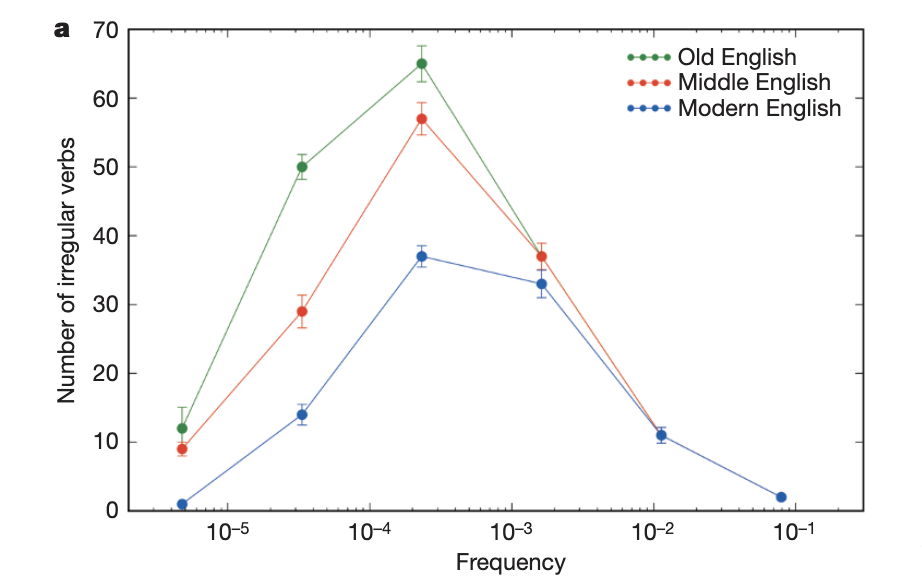


### Natural langugage processing

Xu, & Sasahara, K. (2021). Characterizing the roles of bots on Twitter during the COVID-19 infodemic. Journal of Computational Social Science, 1–19. https://doi.org/10.1007/s42001-021-00139-3

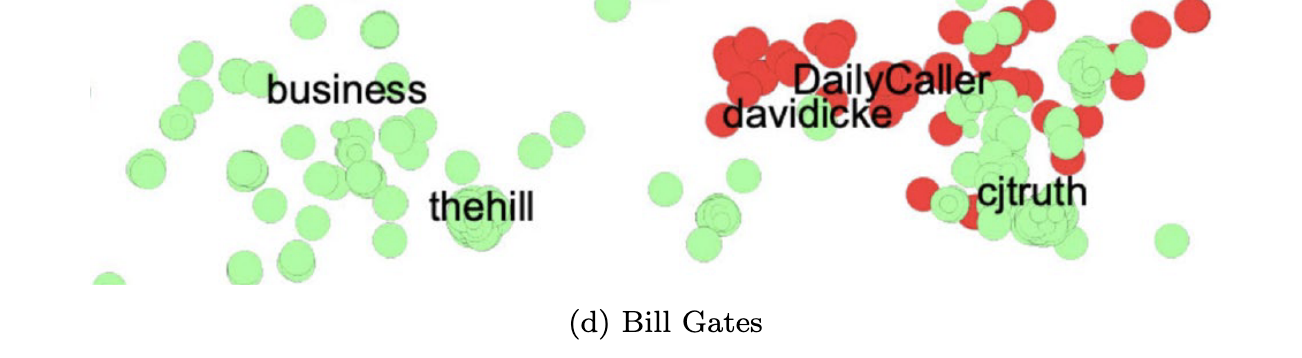


### Supervised machine learning

* Data is often labeled
* Machine learns from the labeled features and applies that learning to unlabeled data

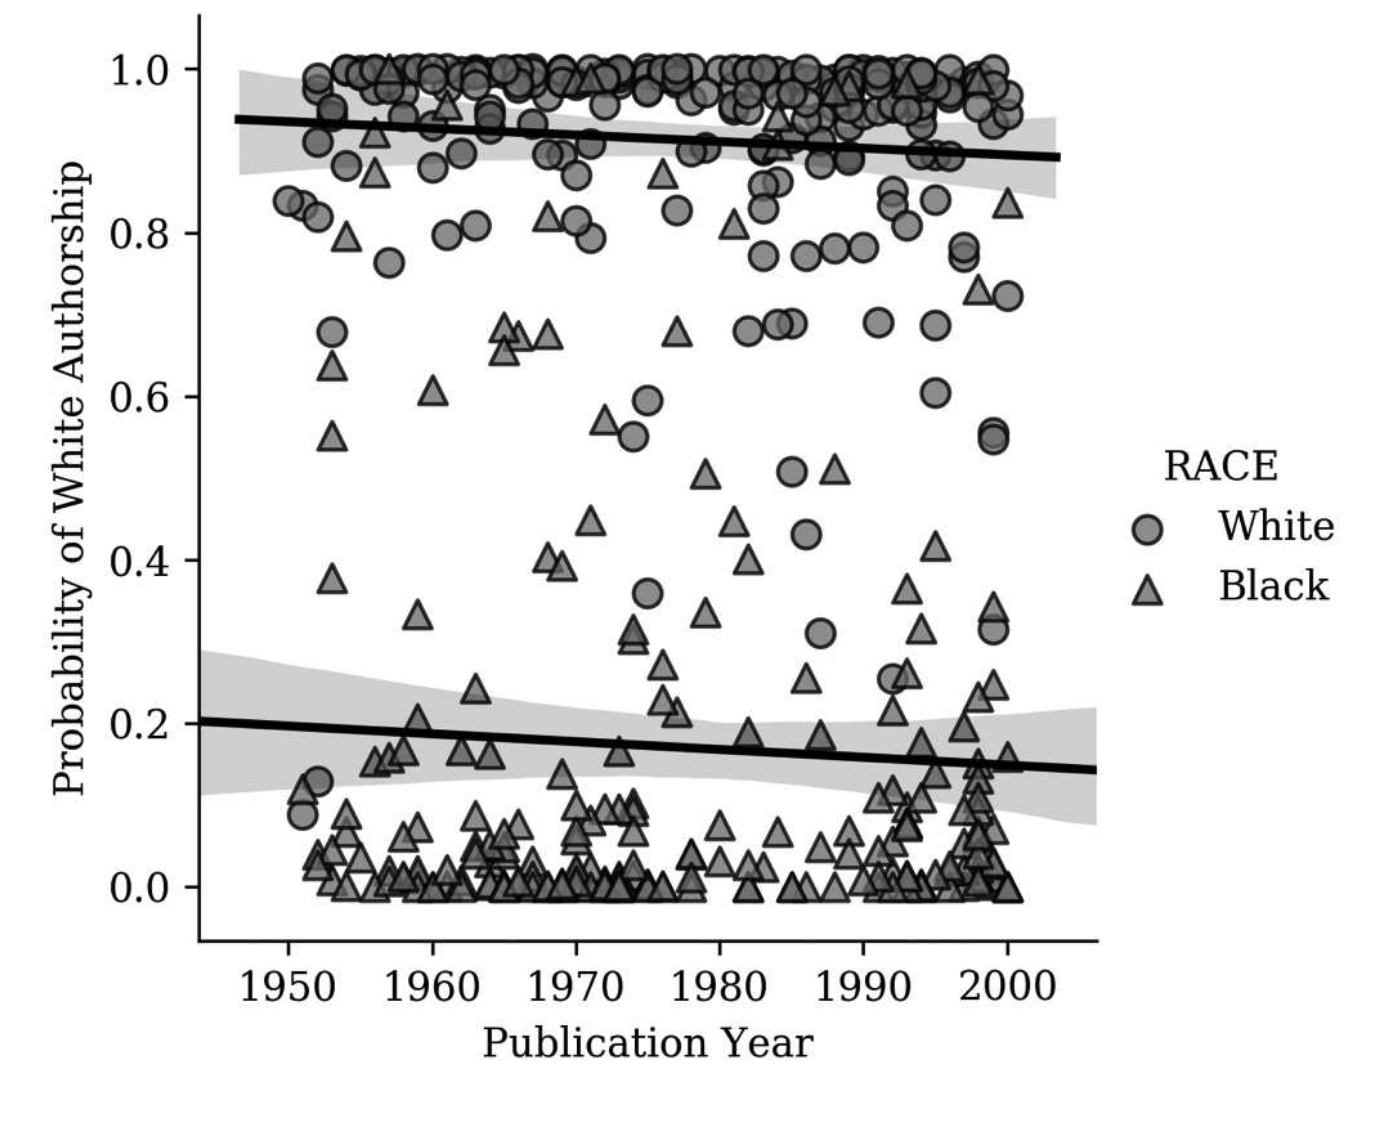

### Unsupervised machine learning

* Data is unlabeled
* Machine learned from the unlabeled data to make inferences
* Example: topic modeling

### Topic modeling

* Popular approach to identifying topics or discourse in text
* There are different approaches
    * We will be doing LDA topic modeling
* Algorithm learns from the data to make guesses about "topics" in the data
* The topics are lists of words

#### Uses for topic modeling
Useful tool for understanding the subject matter of a dataset -- sometimes one that is too large for close reading or as a supplement to close reading.

Originally created for large corpora with relatively large documents (e.g., thousands of science publications). 


####  Topics are probabilities of aboutness

* Basic logic: words that tend to co-occur in a corpus are likely about the same topic. 
* The corpus is divided into chunks called documents. 
* The algorithm checks each word in each document, and if they are likely to co-occur, it then groups them into topics. 
* It's up to the human to analyze the words in the topics and make an assessment of aboutness. 


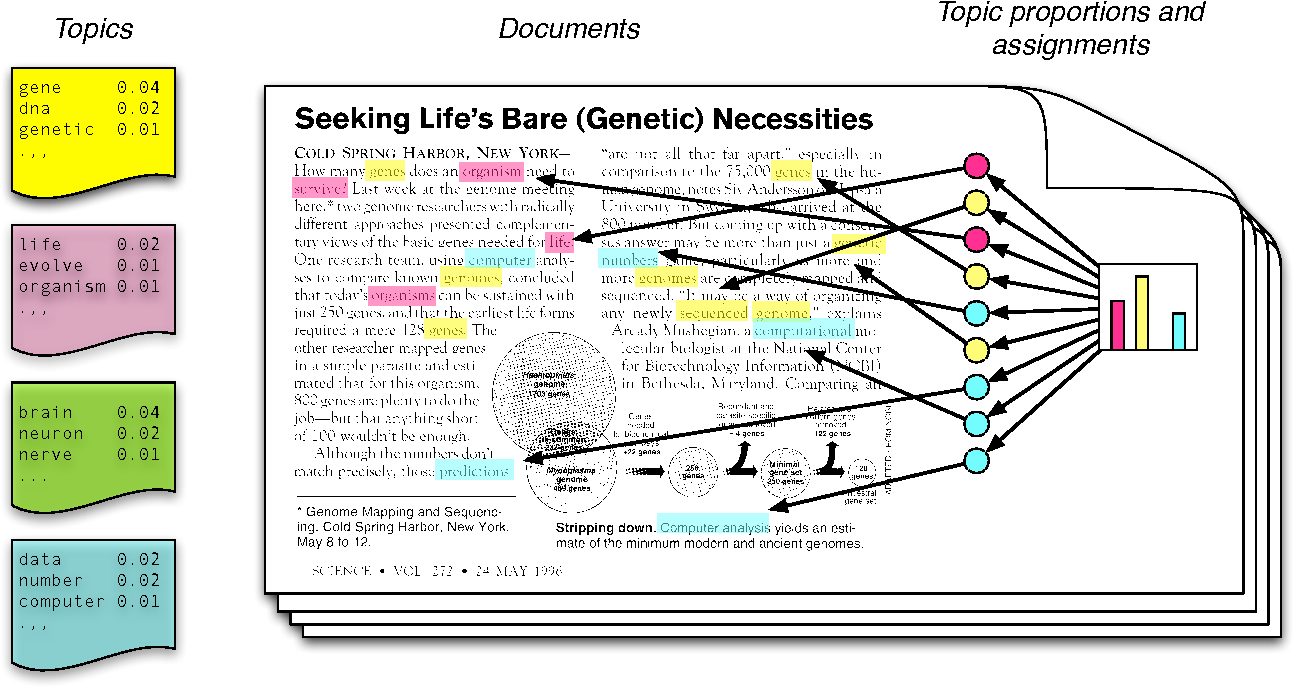

### Research example

"Medicine in the Monthly Review: Revealing public medical discourse with topic modelling," Whitney Arnold and Corey Arnold, *Digital Scholarship in the Humanities*, doi:10.1093/llc/fqab034 

This paper is an analysis of medical discourse in the Monthly Review, a British periodical that was published monthly from 1749 to 1844. The Monthly Review provides a glimpse of the public understanding of medical concepts during the time period as it aimed to review everything that was being published at the time.

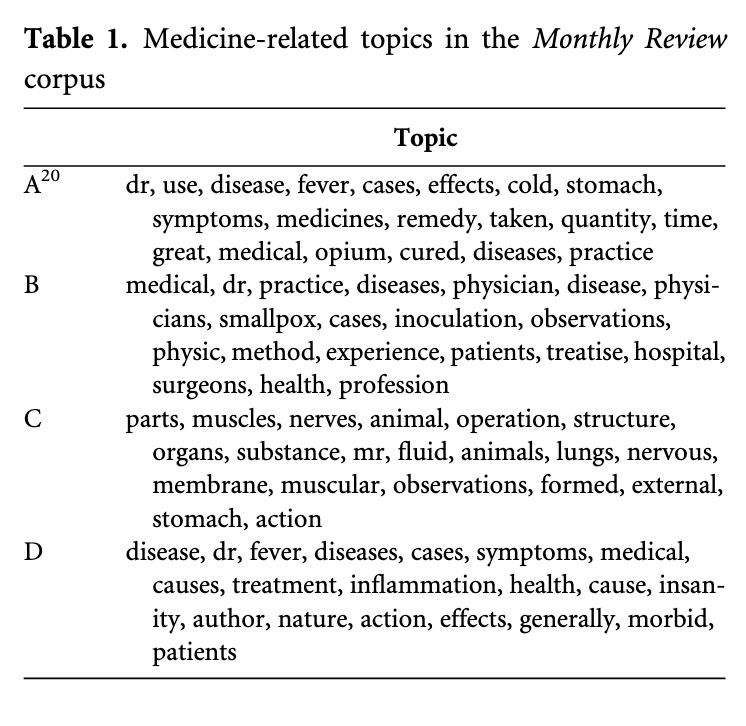

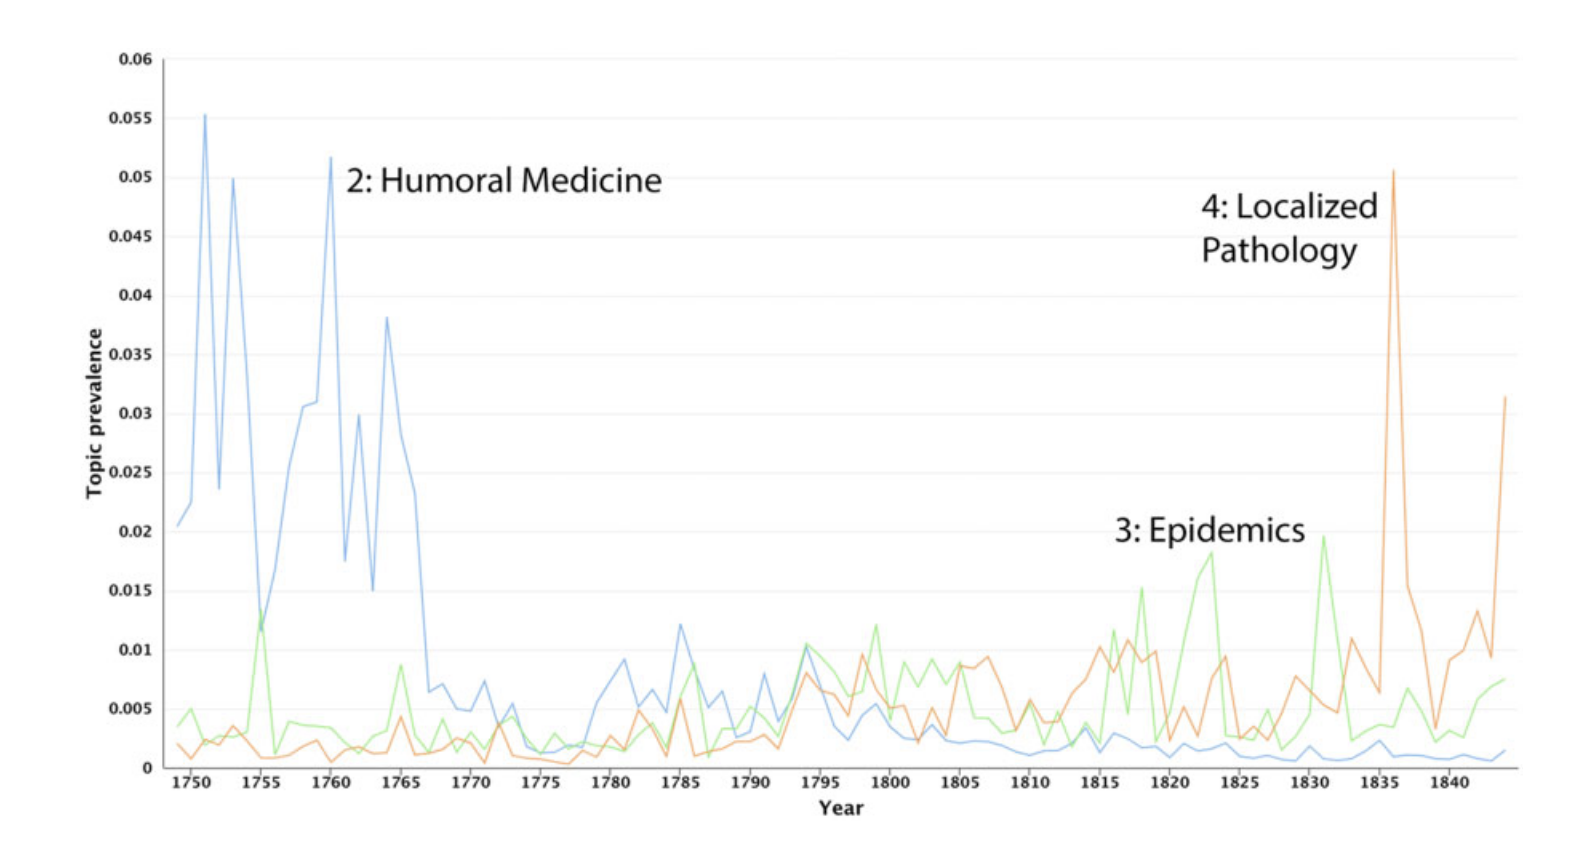

### Gensim for topic modeling

* "Topic modeling for humans"
* LDA topic modeling library for Python
* Intended for large datasets
* Quick
* Code relatively straightforward

### Topic modeling process

* Similar to text analysis process overall
* Not linear 

* Start with unstructured data
* Pre-processing, can include:
    * Combining or breaking apart your text
    * Removing numbers and special characters
    * Removing stopwords
    * Stemming or lemmatizing the text
* Prep data for algorithm
* Run algorithm
* Assess results
* Create visualization

## Hands-on

### Set up

Libraries we need for this example:
* NLTK: data preparation
* Gensim: topic modeling
* pyLDAvis: visualizing our topics

Already installed on JupyterHub and in the Binder instance.

Working locally, you'd want to make sure you installed them before trying to use them in your code.

We'll also need to use import statements to import the modules we will use in the notebook.

### Understand and import the data 

### The data

Dataset of 379 New York Times obituaries (1852-2007) created by Melanie Walsh for her  [*Introduction to Cultural Analytics and Python* book](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html). The obituaries are scraped from the NY Times's ["On This Day" site](https://archive.nytimes.com/www.nytimes.com/learning/general/onthisday/) where each day the NY Times posted an obituary for someone born on that day in history. 

The obituries are stored as individual text files.  


*Note*: Melanie's dataset is based on [another tutorial from Matt Lavin for Programming Historian](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf). 

### Loading our data

We're using glob, a handy module to navigate a directory structure. Remember we imported it in the intro. 

In [ ]:
directory_path = 'NYT-Obituaries'
text_files = glob.glob(f"{directory_path}/*")

Let's check to see that the files were brought in. We can use the list index to call the first text file in text_files.

In [ ]:
# change the number in the brackets to see a different file
text_files[70]

### Create list of our obituary data

1. Create an empty list, listOfObits
2. Use a for loop and iterate through the files in text_files
3. Open and read each, and then apending them to listOfObits

In [ ]:
listOfObits = []
for i in text_files:
    try:
        with open(i) as f:
            listOfObits.append(f.read())
    except:
        pass

Let's check to make sure we got all the files using len(). The length is the number of items in the list. 

In [ ]:
len(text_files)

In [ ]:
len(listOfObits)

### Call items in listOfObits
* First brackets refer to a specific item in our list, in this case the 100th item.
    * Python starts counting at 0.
* Second brackets are optional and restrict what is returned to a slice of the data (characters 0 to 300). 
    * If we didn't slice, then we'd return the text of one obituary. 

In [ ]:
listOfObits[100][0:300]

## Prepare the data

### Steps to take:

Using NLTK:
* Remove stopwords
* Tokenization
* Lemmatization

First, need to import relevant NLTK modules, plus a module called punctuation that will allow us to remove punctuation from the text. 

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

### Remove stopwords

Let's check out the NLTK stopword list to see what will get removed.

In [ ]:
standardStop = stopwords.words('english')
print (standardStop)

Create custom stopword list called extraStop that we will combine with the standard list in a new list. 

In [ ]:
extraStop = ['``',"''","'re","'s","'re",'``',"''","'ll","--","\'\'","...", "n\'t," "would", "also", "said", "year"]

Create combined myStopWords list containing the punctuation marks, standardStop, and extraStop lists. Print the list to see it. 

In [ ]:
myStopWords = list(punctuation) + standardStop + extraStop

print(myStopWords)

### Tokenize


We're going to iterate through the words in the obituaries, lowercase them, tokenize them, and add them to a list called allObitWords, which will be a list of lists of words in each issue. 

In [ ]:
listOfObitWords = []
allObitWords = []
for i in listOfObits:
    processedText = [w for w in word_tokenize(i.lower()) if w not in myStopWords and len(w) > 3]
    listOfObitWords.append(processedText)
    for token in processedText:
        allObitWords.append(token)

In [ ]:
listOfObitWords

### Lemmatize

We will iterate through the tokens in listOfObitWords, lemmatize them, and add them to listofLemWords.  

Lemmatization will render every token into it's canonical form of the word, for example cats ⭢ cat and walked ⭢ walk.

In [ ]:
listOfLemWords = []
wordnet_lemmatizer = WordNetLemmatizer()
for i in listOfObitWords:
    listOfLemWords.append([wordnet_lemmatizer.lemmatize(w) for w in i])

### The processed text
Let's take a look at a slice of tokens from list item 6.

In [ ]:
listOfLemWords[6][0:50]

What other steps might we have wanted to take to prepare our data?

## Structure the data

### Creating your bag of words

Gensim expects the data in a certain format. 

First, we need to build a Gensim corpus (dictionary) from our list. Then we need to translate the dictionary into a bag-of-words. 


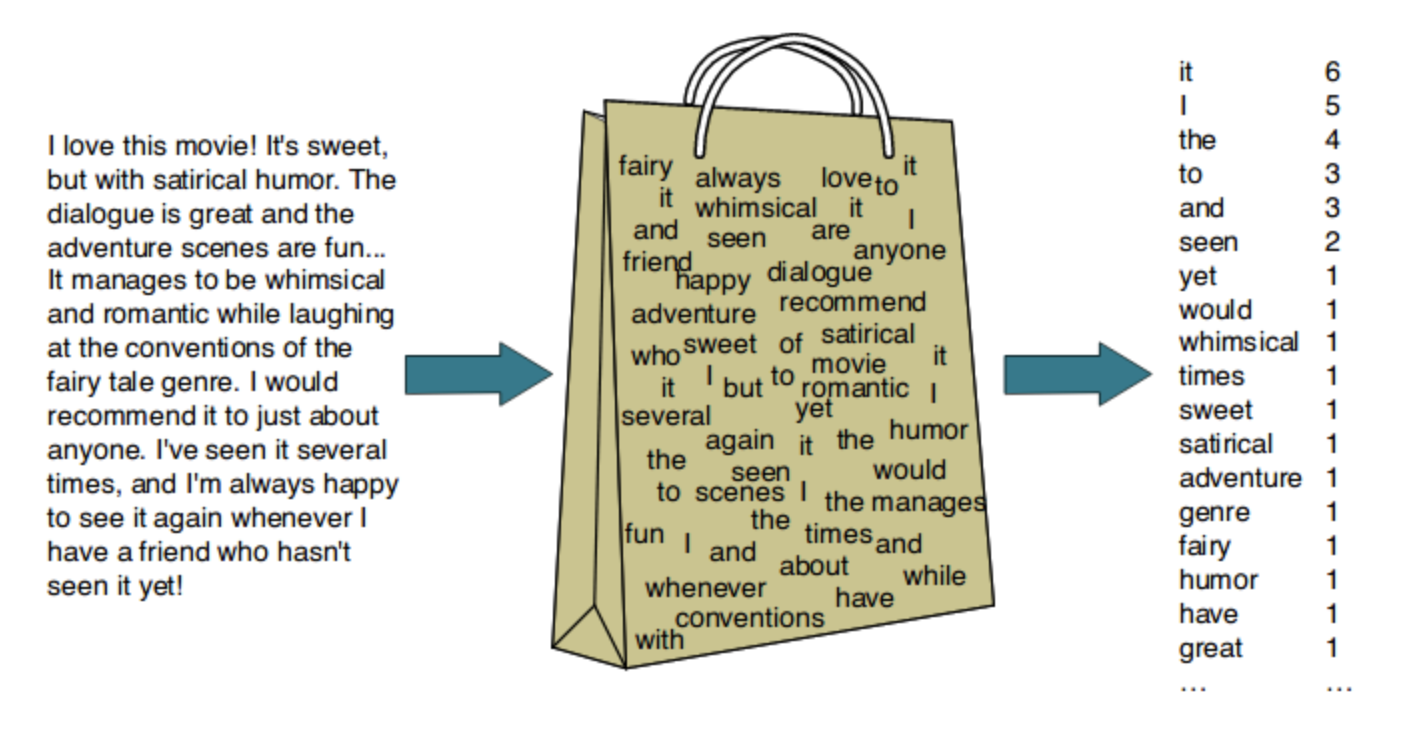


But before any of that, we need to import Gensim and the corpora and models modules.

In [ ]:
import gensim
from gensim import corpora

### Building our corpus

First, define a variable called dictionary. 

Gensim's corpora module will map the words in each document to integer IDs (i.e., assigning each unique word in the corpus a corresponding number).

In [ ]:
dictionary = corpora.Dictionary(listOfLemWords) 

We can check the ID of any token an our corpus. 

In [ ]:
#try looking up another word to find its ID
print(dictionary.token2id['broadway'])

Then define a new variable called corpus using Gensim's doc2bow.

The BOW will be a list of tuples -- consisting of word ID and frequency pairs -- that represent each document in our corpus. 

In [ ]:
corpus = [dictionary.doc2bow(text) for text in listOfLemWords]

Let's take a look at our corpus.

In [ ]:
print(corpus[9][0:300])

## Run the model and view topics

Gensim has a module called models for LDA topic modeling. We'll import the models module and then create our topics. 

In [ ]:
from gensim import models

### Parameters 

There are parameters that we have the option to set when creating the topic model. We're using just couple here:

* num_topics: the number of topics our model will create. This is a parameter you can adjust based on your corpus size and the length of the documents. 
* passes: the number of times the algorithm will pass through the documents. A higher number is likely to yield higher quality topics, but will take more time to run. 

All the available parameters are in the [Gensim docs](https://radimrehurek.com/gensim/models/ldamodel.html). 

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=20)

The notation show_topics() will return the 10 most salient words in each of our topics. 

In [ ]:
lda_model.show_topics()
#try adding a topic number (e.g., 5) and topn= 20 to see twenty words in topic 5, for example show_topic(9, topn=20)

Let's print a cleaner view of our topics

In [ ]:
for i in range(20):
    print('Topic '+str(i))
    for j in lda_model.show_topic(i, topn=20):
            print(j[0])
    print('\n')

## Visualize topics

Visualizing our topics will help us make sense of them. pyLDAvis is a frequently used Python library for visualizing the outputs of Gensim topic models. 


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds="mmds", R=30)
vis

### On your own
Try to:
* adjust the parameters
* modify the stopword list

### Other libraries/tools for topic modeling

* [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
* [Mallet](https://mallet.cs.umass.edu/diagnostics.php)

### Where to learn more

* [Melanie Walsh's Introduction to Cultural Analytics & Python](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html)
* [Programming Historial Mallet tutorial](https://programminghistorian.org/en/lessons/topic-modeling-and-mallet)
* [Gensim YouTube tutorials](https://www.youtube.com/watch?v=TKjjlp5_r7o) 

## Wrap-up

Questions?

link to assessment survey